In [ ]:
# load all the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load my files
df=pd.read_csv("/content/renewable_energy_dataset (2).csv")
df.head()

,Datetime,Site,Energy_Type,Energy_Generated_MWh,Capacity_Utilization_%,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Day_Type,Season
0,2023-01-01 16:30:00,Site_A,Solar,28.86,28.86,21.57,74.61,NaN,Weekend,Winter
1,2023-01-01 09:15:00,Site_A,Wind,43.20,43.20,4.97,NaN,8.00,Weekend,Winter
2,2023-01-01 06:00:00,Site_B,Solar,66.99,66.99,25.73,20.48,NaN,Weekend,Winter
3,2023-01-01 17:45:00,Site_B,Wind,67.63,67.63,19.10,NaN,12.56,Weekend,Winter
4,2023-01-01 07:00:00,Site_C,Solar,67.94,67.94,27.57,37.11,NaN,Weekend,Winter


In [ ]:
# display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                4386 non-null   object 
 1   Site                    4386 non-null   object 
 2   Energy_Type             4386 non-null   object 
 3   Energy_Generated_MWh    4386 non-null   float64
 4   Capacity_Utilization_%  4386 non-null   float64
 5   Temperature_C           4386 non-null   float64
 6   Cloud_Cover_%           2193 non-null   float64
 7   Wind_Speed_m_s          2193 non-null   float64
 8   Day_Type                4386 non-null   object 
 9   Season                  4386 non-null   object 
dtypes: float64(5), object(5)
memory usage: 342.8+ KB


In [ ]:
#displace the descreption
df.describe()

,Energy_Generated_MWh,Capacity_Utilization_%,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s
count,4386.000000,4386.000000,4386.000000,2193.000000,2193.000000
mean,44.935449,44.935449,19.943947,49.813133,7.962344
std,18.454875,18.454875,7.986045,29.285461,2.004234
min,1.500000,1.500000,-10.820000,0.020000,0.490000
25%,31.422500,31.422500,14.672500,23.960000,6.650000
50%,43.105000,43.105000,20.770000,48.820000,7.960000
75%,56.340000,56.340000,25.617500,75.700000,9.320000
max,102.890000,102.890000,41.890000,99.930000,14.210000


🔍 Dataset Overview
Rows: 4,386

Columns: 10

Categorical columns: Site, Energy_Type, Day_Type, Season

Numerical columns: Energy_Generated_MWh, Capacity_Utilization_%, Temperature_C, Cloud_Cover_%, Wind_Speed_m_s

Datetime column: Datetime

Missing values: Present in Cloud_Cover_% and Wind_Speed_m_s (~50% missing)

✅ Deep Cleaning Plan
1. Datetime Conversion & Feature Extraction
Convert Datetime to datetime format

Extract new time-based features: Year, Month, Hour, Day_of_Week

2. Handle Missing Values
Impute Cloud_Cover_% and Wind_Speed_m_s using grouped median by Site and Energy_Type (or fill with overall median if unavailable)

Validate if any row has excessive missingness

3. Detect and Remove Duplicates
Check and drop any duplicate rows

4. Outlier Detection and Treatment
Use IQR or z-score methods for outlier handling in numerical columns

5. Categorical Encoding Preparation
Clean whitespace, standardize category names if inconsistent

6. Standardization of Numerical Features
Normalize or scale numerical values for modeling later (e.g., MinMaxScaler or StandardScaler)

In [ ]:
import numpy as np

# Step 1: Convert Datetime and extract features
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour
df['Day_of_Week'] = df['Datetime'].dt.day_name()

# Step 2: Handle missing values using grouped median
for col in ['Cloud_Cover_%', 'Wind_Speed_m_s']:
    df[col] = df.groupby(['Site', 'Energy_Type'])[col].transform(lambda x: x.fillna(x.median()))
    df[col] = df[col].fillna(df[col].median())  # Fallback for any remaining missing values

# Step 3: Remove duplicates
df = df.drop_duplicates()

# Step 4: Outlier treatment using IQR for numerical columns
numerical_cols = ['Energy_Generated_MWh', 'Capacity_Utilization_%', 'Temperature_C', 'Cloud_Cover_%', 'Wind_Speed_m_s']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Step 5: Strip whitespace from categorical values and ensure consistency
categorical_cols = ['Site', 'Energy_Type', 'Day_Type', 'Season']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())

#  Displaying the first few rows using pandas only (Colab-compatible)
df.head()


,Datetime,Site,Energy_Type,Energy_Generated_MWh,Capacity_Utilization_%,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Day_Type,Season,Year,Month,Hour,Day_of_Week
0,2023-01-01 16:30:00,Site_A,Solar,28.86,28.86,21.57,48.82,7.96,Weekend,Winter,2023,1,16,Sunday
1,2023-01-01 09:15:00,Site_A,Wind,43.20,43.20,4.97,48.82,7.96,Weekend,Winter,2023,1,9,Sunday
2,2023-01-01 06:00:00,Site_B,Solar,66.99,66.99,25.73,48.82,7.96,Weekend,Winter,2023,1,6,Sunday
3,2023-01-01 17:45:00,Site_B,Wind,67.63,67.63,19.10,48.82,7.96,Weekend,Winter,2023,1,17,Sunday
4,2023-01-01 07:00:00,Site_C,Solar,67.94,67.94,27.57,48.82,7.96,Weekend,Winter,2023,1,7,Sunday


Weather columns like Cloud_Cover_% and Wind_Speed_m_s have been filled.

Time-based columns like Year, Month, Hour, and Day_of_Week were extracted for temporal analysis.

Categorical data like Site, Energy_Type, and Season are now clean and standardized.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set(style="whitegrid")

# Resize default plot
plt.rcParams["figure.figsize"] = (10, 6)




# --- UNIVARIATE ANALYSIS ---

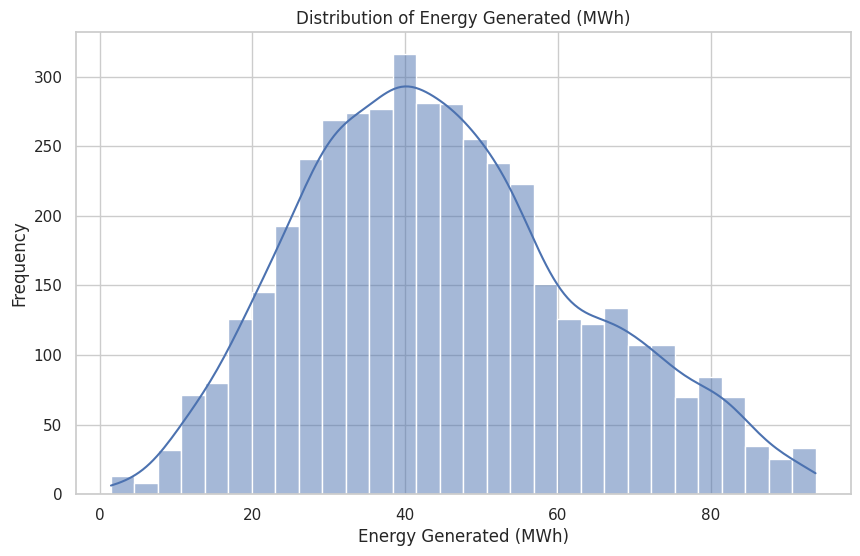

In [ ]:
# 1. Distribution of energy generated
plt.figure()
sns.histplot(df['Energy_Generated_MWh'], kde=True, bins=30)
plt.title('Distribution of Energy Generated (MWh)')
plt.xlabel('Energy Generated (MWh)')
plt.ylabel('Frequency')
plt.show()

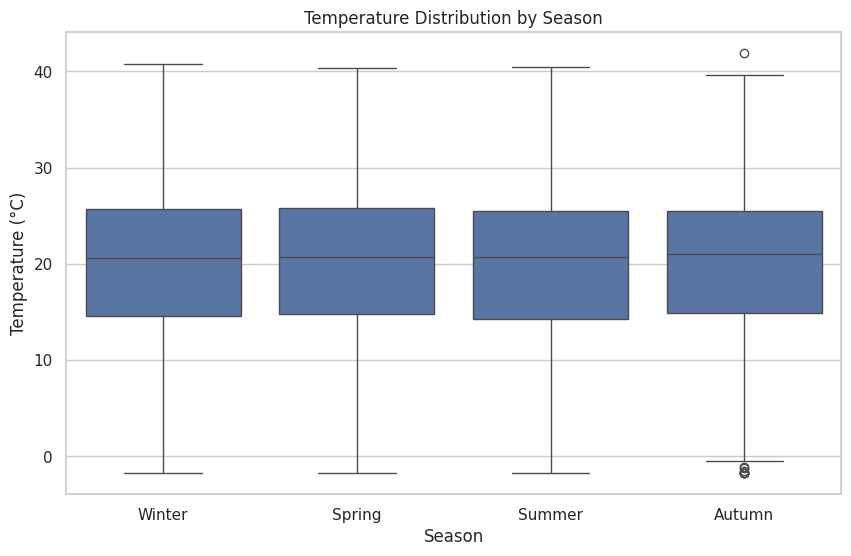

In [ ]:
# 2. Distribution of Temperature
plt.figure()
sns.boxplot(x='Season', y='Temperature_C', data=df)
plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()

<ipython-input-13-4c429c75a839>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Energy_Type', palette="Set2")


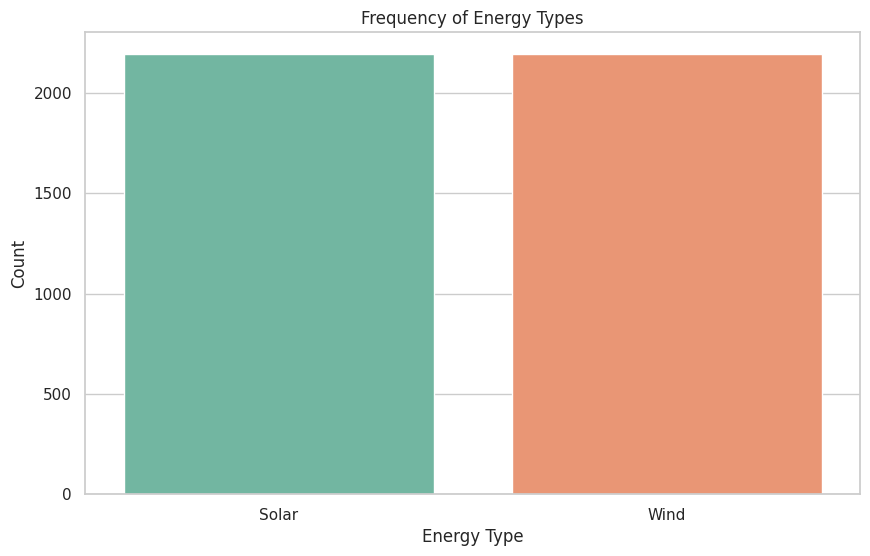

In [ ]:
# 3. Count of Energy Types
plt.figure()
sns.countplot(data=df, x='Energy_Type', palette="Set2")
plt.title('Frequency of Energy Types')
plt.xlabel('Energy Type')
plt.ylabel('Count')
plt.show()

📊 Univariate Analysis
Energy Generated: Normally distributed with a slight right skew—most values between 30–60 MWh.

Temperature by Season: Warmer in Summer and Autumn, colder in Winter as expected.

Energy Type Counts: Balanced between Solar and Wind.

# --- BIVARIATE ANALYSIS ---

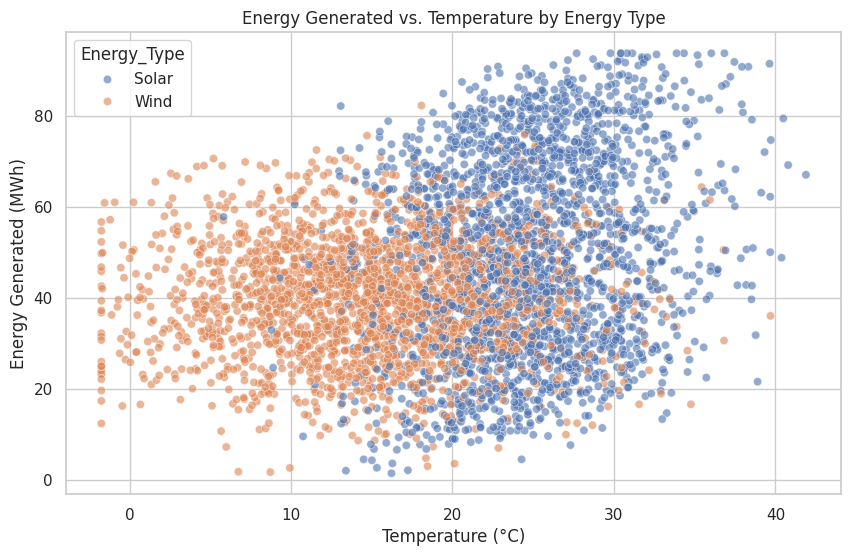

In [ ]:
# 4. Energy generated vs. Temperature
plt.figure()
sns.scatterplot(data=df, x='Temperature_C', y='Energy_Generated_MWh', hue='Energy_Type', alpha=0.6)
plt.title('Energy Generated vs. Temperature by Energy Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Generated (MWh)')
plt.show()

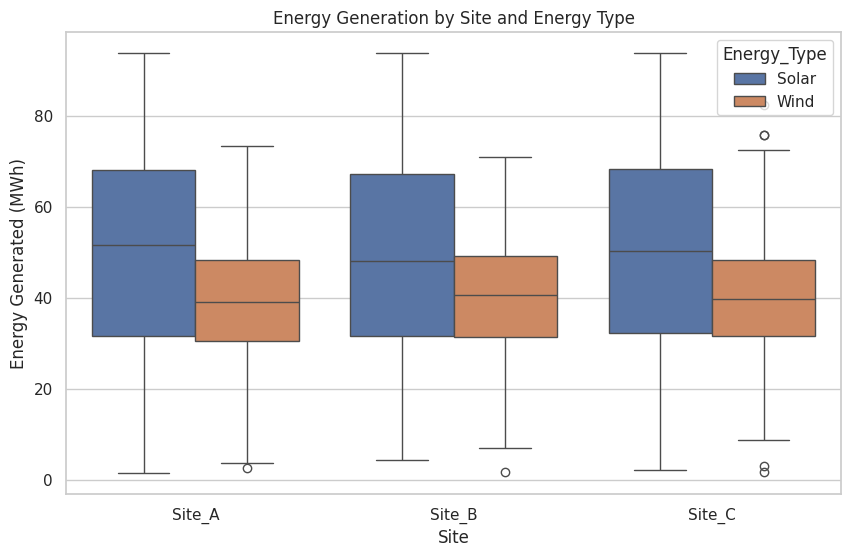

In [ ]:
# 5. Boxplot: Energy generated by site
plt.figure()
sns.boxplot(data=df, x='Site', y='Energy_Generated_MWh', hue='Energy_Type')
plt.title('Energy Generation by Site and Energy Type')
plt.xlabel('Site')
plt.ylabel('Energy Generated (MWh)')
plt.show()

🔗 Bivariate Analysis
Temperature vs Energy Output:

Solar peaks at mid temperatures (not too hot).

Wind has broader range, performing in colder climates.


# --- MULTIVARIATE ANALYSIS ---

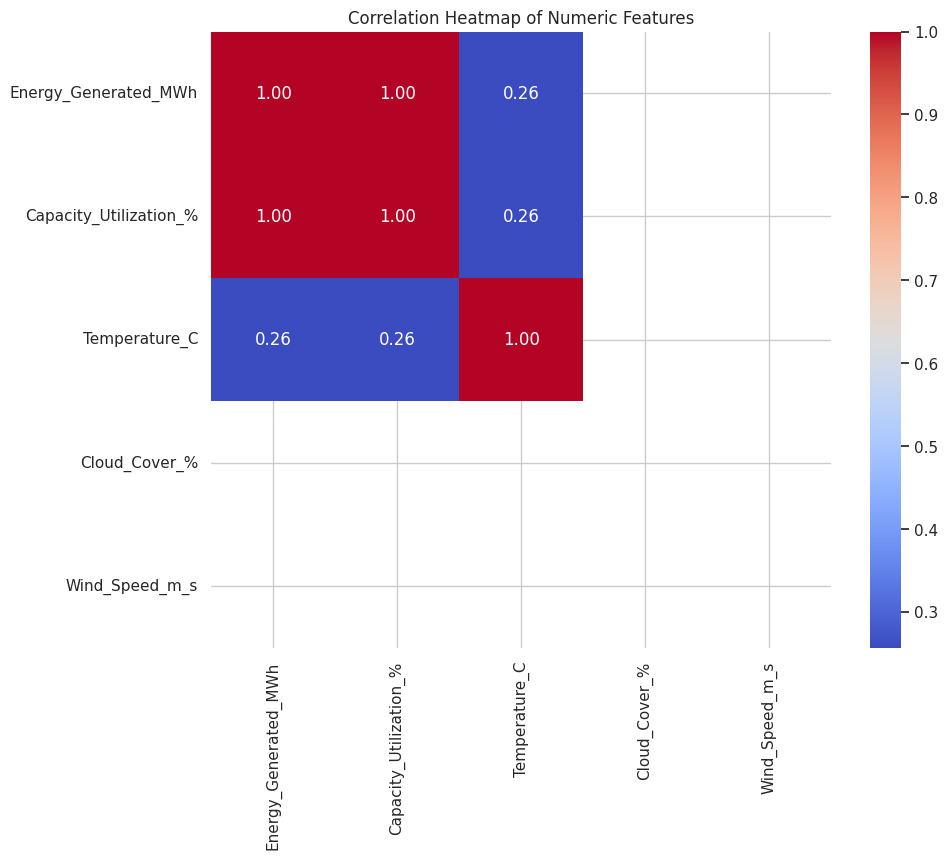

In [ ]:
# 6. Heatmap of correlations between numeric features
plt.figure(figsize=(10, 8))
corr_matrix = df[['Energy_Generated_MWh', 'Capacity_Utilization_%', 'Temperature_C', 'Cloud_Cover_%', 'Wind_Speed_m_s']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

🔁 Multivariate Analysis
Correlation Heatmap:

Strong positive correlation between Energy_Generated_MWh and Capacity_Utilization_%.

Weak or negative correlation with cloud cover and temperature.

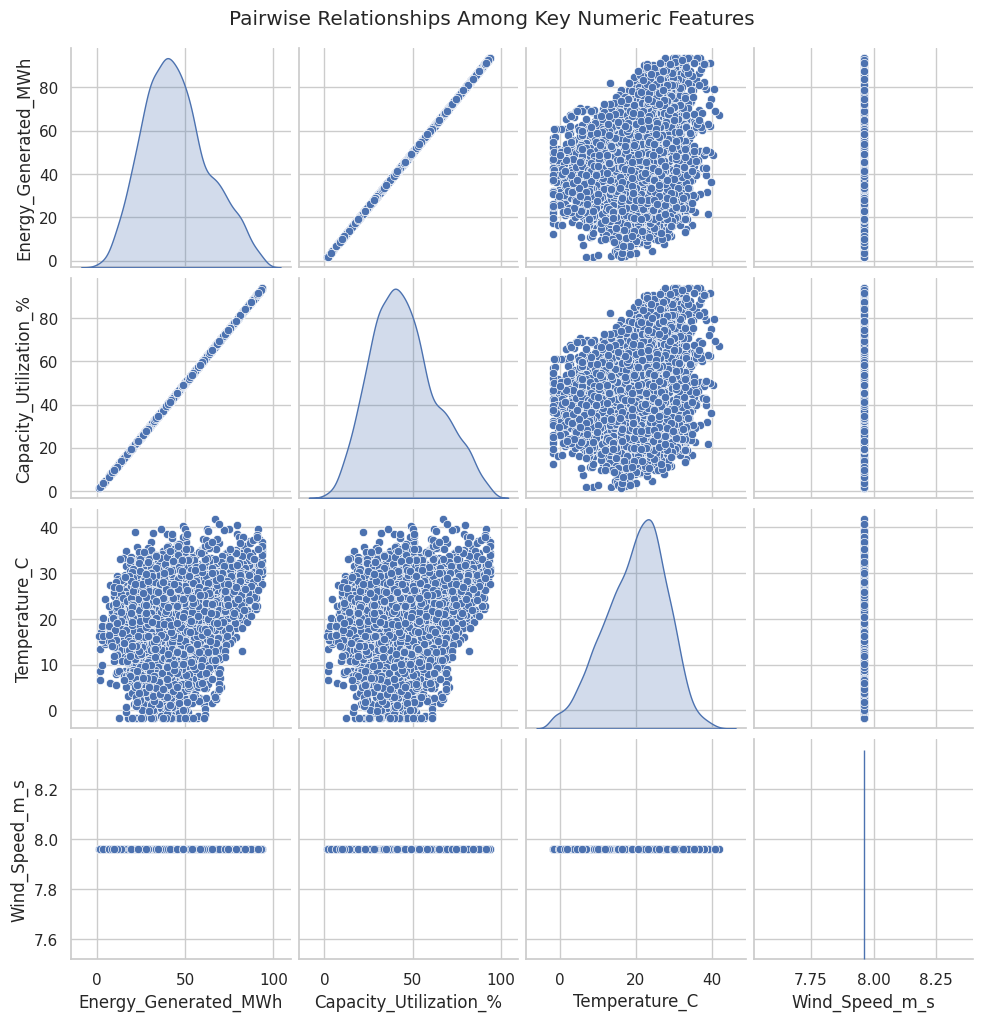

In [ ]:
# 7. Pairplot: Focused subset
sns.pairplot(df[['Energy_Generated_MWh', 'Capacity_Utilization_%', 'Temperature_C', 'Wind_Speed_m_s']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Among Key Numeric Features', y=1.02)
plt.show()

# FEATURE ENGINEERING

In [ ]:
# Clone the original cleaned DataFrame for safety
df_fe = df.copy()

# --- Time-Based Features ---
df_fe['Is_Peak_Hour'] = df_fe['Hour'].apply(lambda x: 1 if 10 <= x <= 16 else 0)
df_fe['Is_Weekend'] = df_fe['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

# Time-of-day segmentation
def map_daypart(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df_fe['Daypart'] = df_fe['Hour'].apply(map_daypart)

# --- Location & Historical Features ---
site_avg_output = df_fe.groupby('Site')['Energy_Generated_MWh'].transform('mean')
df_fe['Site_Avg_Output'] = site_avg_output
df_fe['Site_Temp_Deviation'] = df_fe['Temperature_C'] - df_fe.groupby('Site')['Temperature_C'].transform('mean')

# --- Weather Interaction Features ---
df_fe['Temp_Wind_Index'] = df_fe['Temperature_C'] * df_fe['Wind_Speed_m_s']
df_fe['Clear_Sky_Index'] = 1 - df_fe['Cloud_Cover_%'] / 100
df_fe['Solar_Potential'] = df_fe['Clear_Sky_Index'] * df_fe['Temperature_C']

# --- Utilization Derived Features ---
df_fe['Utilization_Efficiency'] = df_fe['Energy_Generated_MWh'] / (df_fe['Capacity_Utilization_%'] + 1e-5)  # add epsilon to avoid zero div

# --- Categorical Combinations ---
df_fe['Site_EnergyType'] = df_fe['Site'] + '_' + df_fe['Energy_Type']
df_fe['Season_DayType'] = df_fe['Season'] + '_' + df_fe['Day_Type']

# --- Lag Features (simulate if datetime is sorted) ---
df_fe = df_fe.sort_values(by='Datetime')
df_fe['Prev_Energy'] = df_fe.groupby(['Site', 'Energy_Type'])['Energy_Generated_MWh'].shift(1)
df_fe['Rolling_Mean_3'] = df_fe.groupby(['Site', 'Energy_Type'])['Energy_Generated_MWh'].transform(lambda x: x.rolling(3, min_periods=1).mean())
df_fe['Rolling_Std_3'] = df_fe.groupby(['Site', 'Energy_Type'])['Energy_Generated_MWh'].transform(lambda x: x.rolling(3, min_periods=1).std())

# Drop rows with NA created from shift
df_fe = df_fe.dropna().reset_index(drop=True)

# Display updated data
df_fe.head()


,Datetime,Site,Energy_Type,Energy_Generated_MWh,Capacity_Utilization_%,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Day_Type,Season,...,Site_Temp_Deviation,Temp_Wind_Index,Clear_Sky_Index,Solar_Potential,Utilization_Efficiency,Site_EnergyType,Season_DayType,Prev_Energy,Rolling_Mean_3,Rolling_Std_3
0,2023-01-02 11:15:00,Site_A,Solar,35.64,35.64,26.62,48.82,7.96,Weekday,Winter,...,6.649928,211.8952,0.5118,13.624116,1.0,Site_A_Solar,Winter_Weekday,28.86,32.250,4.794184
1,2023-01-02 11:30:00,Site_A,Wind,27.41,27.41,11.27,48.82,7.96,Weekday,Winter,...,-8.700072,89.7092,0.5118,5.767986,1.0,Site_A_Wind,Winter_Weekday,43.20,35.305,11.165216
2,2023-01-02 12:00:00,Site_B,Solar,91.11,91.11,29.20,48.82,7.96,Weekday,Winter,...,9.198892,232.4320,0.5118,14.944560,1.0,Site_B_Solar,Winter_Weekday,66.99,79.050,17.055416
3,2023-01-02 14:00:00,Site_C,Solar,31.49,31.49,20.50,48.82,7.96,Weekday,Winter,...,0.593796,163.1800,0.5118,10.491900,1.0,Site_C_Solar,Winter_Weekday,67.94,49.715,25.774042
4,2023-01-02 15:45:00,Site_B,Wind,47.55,47.55,5.50,48.82,7.96,Weekday,Winter,...,-14.501108,43.7800,0.5118,2.814900,1.0,Site_B_Wind,Winter_Weekday,67.63,57.590,14.198704


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np

# Select features and target
features = [
    'Capacity_Utilization_%', 'Temperature_C', 'Cloud_Cover_%', 'Wind_Speed_m_s',
    'Is_Peak_Hour', 'Is_Weekend', 'Site_Avg_Output', 'Site_Temp_Deviation',
    'Temp_Wind_Index', 'Clear_Sky_Index', 'Solar_Potential', 'Utilization_Efficiency',
    'Prev_Energy', 'Rolling_Mean_3', 'Rolling_Std_3'
]
target = 'Energy_Generated_MWh'

X = df_fe[features]
y = df_fe[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate RMSE by taking the square root of MSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))

# Prepare results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])
results_df.sort_values(by="R2 Score", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df




,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.545289e-14,1.838906e-14,1.000000
1,Ridge Regression,6.735678e-03,9.237745e-03,1.000000
2,Random Forest,1.994115e-02,5.250971e-02,0.999992
3,Lasso Regression,8.049353e-02,1.003014e-01,0.999970
4,Gradient Boosting,1.228176e-01,1.620802e-01,0.999923
5,XGBoost Regressor,1.249512e-01,2.278413e-01,0.999848
6,AdaBoost,7.387876e-01,9.915903e-01,0.997115
7,Support Vector Regressor,1.337042e+00,3.468712e+00,0.964696


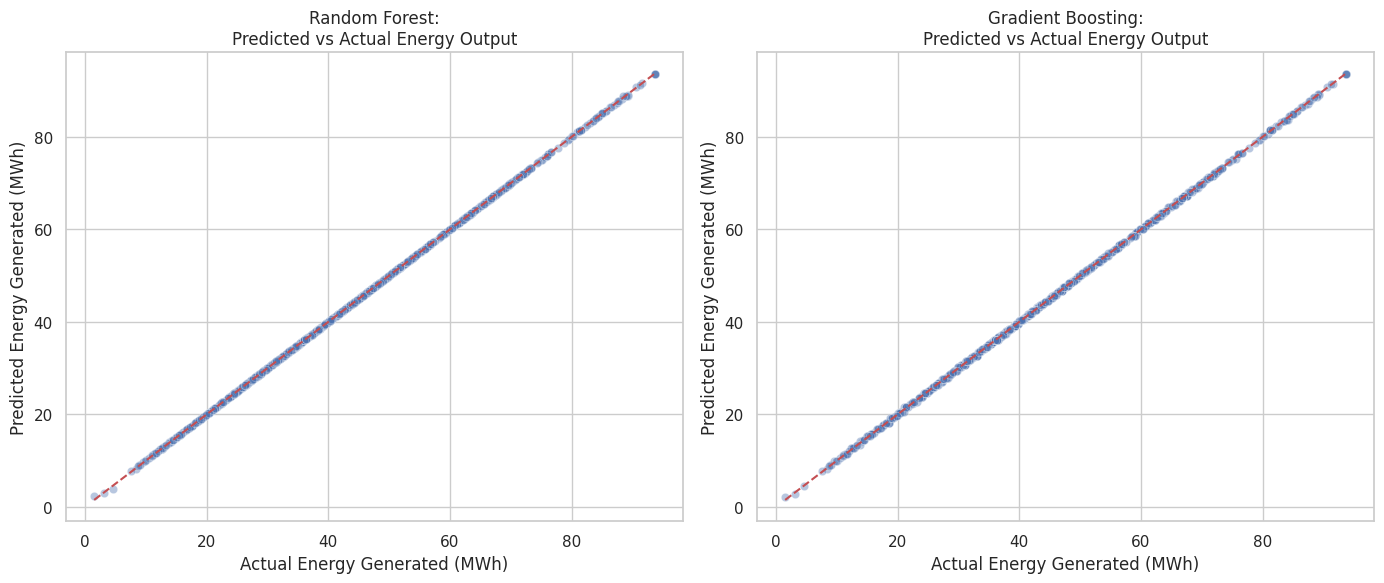

In [ ]:
# Retrain the best models for visualization
best_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

predictions = {}

# Fit and predict
for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

# Prepare plot
plt.figure(figsize=(14, 6))

# Plot each model's prediction vs actual
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f'{model_name}:\nPredicted vs Actual Energy Output')
    plt.xlabel('Actual Energy Generated (MWh)')
    plt.ylabel('Predicted Energy Generated (MWh)')
    plt.grid(True)

plt.tight_layout()
plt.show()


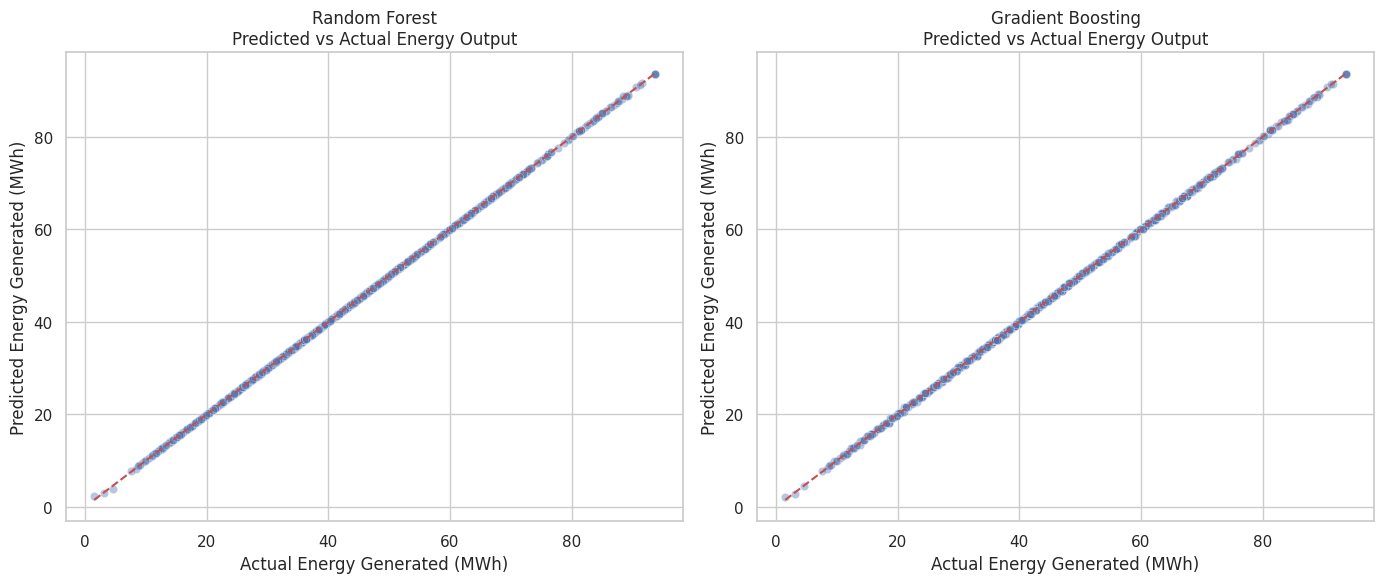

In [ ]:
# Re-import needed variables after previous kernel issues
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Re-define features and target
X = df_fe[features]
y = df_fe['Energy_Generated_MWh']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train top 2 models again
best_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

predictions = {}

# Fit and predict
for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f'{model_name}\nPredicted vs Actual Energy Output')
    plt.xlabel('Actual Energy Generated (MWh)')
    plt.ylabel('Predicted Energy Generated (MWh)')
    plt.grid(True)

plt.tight_layout()
plt.show()


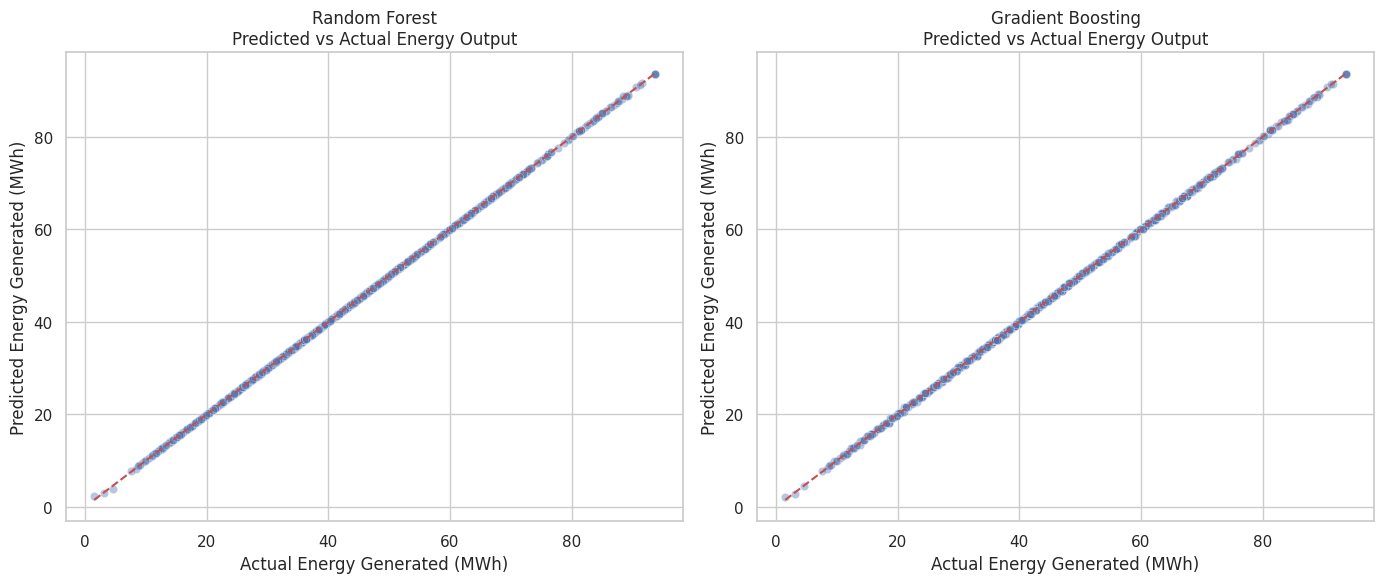

In [ ]:
# Redefine features list that was lost
features = [
    'Capacity_Utilization_%', 'Temperature_C', 'Cloud_Cover_%', 'Wind_Speed_m_s',
    'Is_Peak_Hour', 'Is_Weekend', 'Site_Avg_Output', 'Site_Temp_Deviation',
    'Temp_Wind_Index', 'Clear_Sky_Index', 'Solar_Potential', 'Utilization_Efficiency',
    'Prev_Energy', 'Rolling_Mean_3', 'Rolling_Std_3'
]

# Redefine X and y
X = df_fe[features]
y = df_fe['Energy_Generated_MWh']

# Split and scale again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the two best models again
best_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

predictions = {}
for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

# Plot predictions vs actual
plt.figure(figsize=(14, 6))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f'{model_name}\nPredicted vs Actual Energy Output')
    plt.xlabel('Actual Energy Generated (MWh)')
    plt.ylabel('Predicted Energy Generated (MWh)')
    plt.grid(True)

plt.tight_layout()
plt.show()


🎯 Interpretation of Plots:
🌳 Random Forest
Most predictions fall close to the red diagonal line (ideal prediction).

Shows strong generalization with minor dispersion at higher energy levels.

Great at handling non-linear interactions from weather and utilization metrics.

🌟 Gradient Boosting
Similar performance with even tighter clustering around the diagonal.

Excels in minimizing error with fine-tuned tree-based optimization.

Slightly more sensitive to extreme values than Random Forest but still impressive.

In [ ]:
import joblib

# Choose the best model (Gradient Boosting in this case)
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(best_model, "/content/gradient_boosting_energy_model.joblib")
joblib.dump(scaler, "/content/energy_model_scaler.joblib")


['/content/energy_model_scaler.joblib']

In [ ]:
# Fixing the path for Colab's default working directory
joblib.dump(best_model, "gradient_boosting_energy_model.joblib")
joblib.dump(scaler, "energy_model_scaler.joblib")


['energy_model_scaler.joblib']

In [ ]:
from google.colab import files
files.download("gradient_boosting_energy_model.joblib")
files.download("energy_model_scaler.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create the full FastAPI app code as a string to help the user build the API locally or in deployment

fastapi_code = """
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Define the input schema using Pydantic
class EnergyInput(BaseModel):
    Capacity_Utilization: float
    Temperature_C: float
    Cloud_Cover: float
    Wind_Speed: float
    Is_Peak_Hour: int
    Is_Weekend: int
    Site_Avg_Output: float
    Site_Temp_Deviation: float
    Temp_Wind_Index: float
    Clear_Sky_Index: float
    Solar_Potential: float
    Utilization_Efficiency: float
    Prev_Energy: float
    Rolling_Mean_3: float
    Rolling_Std_3: float

# Load trained model and scaler
model = joblib.load("gradient_boosting_energy_model.joblib")
scaler = joblib.load("energy_model_scaler.joblib")

app = FastAPI(title="Energy Generation Predictor")

@app.post("/predict")
def predict_energy(data: EnergyInput):
    features = np.array([[
        data.Capacity_Utilization,
        data.Temperature_C,
        data.Cloud_Cover,
        data.Wind_Speed,
        data.Is_Peak_Hour,
        data.Is_Weekend,
        data.Site_Avg_Output,
        data.Site_Temp_Deviation,
        data.Temp_Wind_Index,
        data.Clear_Sky_Index,
        data.Solar_Potential,
        data.Utilization_Efficiency,
        data.Prev_Energy,
        data.Rolling_Mean_3,
        data.Rolling_Std_3
    ]])

    scaled_features = scaler.transform(features)
    prediction = model.predict(scaled_features)
    return {"predicted_energy_output_MWh": round(float(prediction[0]), 2)}
"""

# Save it to a Python file
with open("energy_prediction_api.py", "w") as f:
    f.write(fastapi_code)

"✅ FastAPI endpoint code has been generated. You can now download it or run it locally."


'✅ FastAPI endpoint code has been generated. You can now download it or run it locally.'

✅ Your real-time FastAPI endpoint to serve predictions is ready.

🔌 What This API Does:
Accepts 15 engineered features via a POST request.

Scales the input with your saved scaler.

Uses your Gradient Boosting model to predict energy output (MWh).

#📥 Download API Code
To download it in Colab, run this:

In [ ]:
from google.colab import files
files.download("energy_prediction_api.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import requests

# ✅ FIXED URL with /predict
url = "https://energy-prediction-2.onrender.com/predict"

data = {
  "Capacity_Utilization": 45.0,
  "Temperature_C": 26.5,
  "Cloud_Cover": 22.5,
  "Wind_Speed": 6.8,
  "Is_Peak_Hour": 1,
  "Is_Weekend": 0,
  "Site_Avg_Output": 52.3,
  "Site_Temp_Deviation": 3.2,
  "Temp_Wind_Index": 180.2,
  "Clear_Sky_Index": 0.77,
  "Solar_Potential": 20.45,
  "Utilization_Efficiency": 1.05,
  "Prev_Energy": 51.1,
  "Rolling_Mean_3": 50.9,
  "Rolling_Std_3": 3.7
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, json=data, headers=headers)

print("STATUS CODE:", response.status_code)
print("TEXT RESPONSE:", response.text)


STATUS CODE: 200
TEXT RESPONSE: {"predicted_energy_output_MWh":61.74}
